# Plotting


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Plot tactics using melted data

I tend to use this tactic to see a box plot of all the numeric variables in a data set,  with grouping by a factor (often the target, but also factors like gender, etc)


In [2]:
from sklearn.datasets import load_iris
import pandas as pd

data = load_iris()
iris_df = pd.DataFrame(data=data.data, columns=data.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
type(data)

sklearn.utils._bunch.Bunch

In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
iris_df['target']=data.target

In [6]:
iris_df['target_name']=data.target_names[iris_df.target]

In [7]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [8]:
iris_df['Id_number']=iris_df.index

In [9]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name,Id_number
0,5.1,3.5,1.4,0.2,0,setosa,0
1,4.9,3.0,1.4,0.2,0,setosa,1
2,4.7,3.2,1.3,0.2,0,setosa,2
3,4.6,3.1,1.5,0.2,0,setosa,3
4,5.0,3.6,1.4,0.2,0,setosa,4


In [10]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'target_name', 'Id_number'],
      dtype='object')

I added a lot into the df,  the predictor data, the target as an integer, the target names and a column that equals the index

This makes it easier to melt, using the index (Id_number)  and the target name as a compound id_vars,    target_name is not an id variable,   but it allows for group_by like operations on the target_name


In [11]:
iris_melt=pd.melt(iris_df,id_vars=['Id_number','target_name'],value_vars=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)'])
iris_melt.head(10)

,Id_number,target_name,variable,value
0,0,setosa,sepal length (cm),5.1
1,1,setosa,sepal length (cm),4.9
2,2,setosa,sepal length (cm),4.7
3,3,setosa,sepal length (cm),4.6
4,4,setosa,sepal length (cm),5.0
5,5,setosa,sepal length (cm),5.4
6,6,setosa,sepal length (cm),4.6
7,7,setosa,sepal length (cm),5.0
8,8,setosa,sepal length (cm),4.4
9,9,setosa,sepal length (cm),4.9


In [12]:
# Eample plots

# These show all the continuous variables in the data set,   grouped by the hue variable which is the target name or species

# The three plots are all showing the same information, the range of the variables for each of the factors,   all on one plot.

# All three plot variants below give us an idea of the nature of the distributions withing the data

# If the variables have wide ranges of values,  or very different scales,  using a log transform on the Y-axis helps greatly.

SyntaxError: invalid syntax (<ipython-input-12-741718f33e6b>, line 3)

<Axes: xlabel='variable', ylabel='value'>

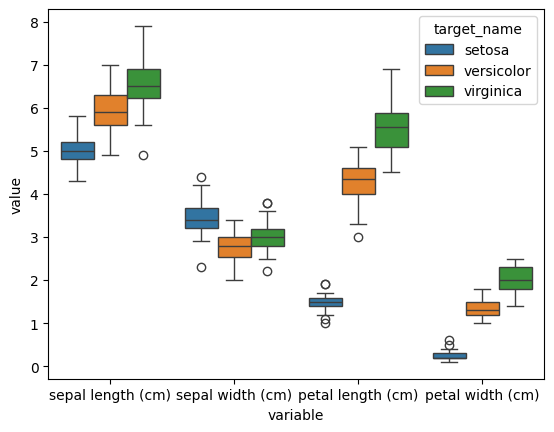

In [13]:
sns.boxplot(x='variable',y='value',hue='target_name',data=iris_melt)

<Axes: xlabel='variable', ylabel='value'>

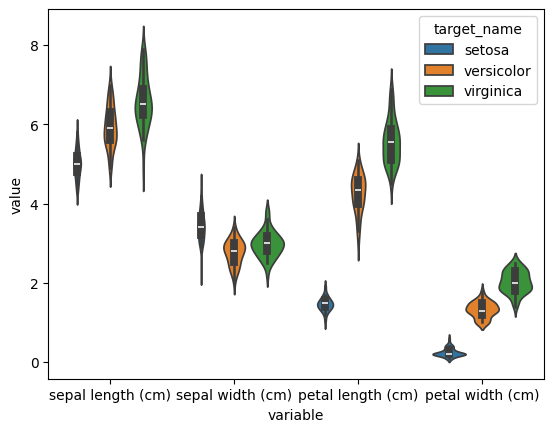

In [14]:
sns.violinplot(x='variable',y='value',hue='target_name',data=iris_melt)

<ipython-input-15-b6e6eb9749c6>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x="value", y="variable", hue='target_name',
<ipython-input-15-b6e6eb9749c6>:12: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(x="value", y="variable", hue='target_name',
<ipython-input-15-b6e6eb9749c6>:12: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(x="value", y="variable", hue='target_name',


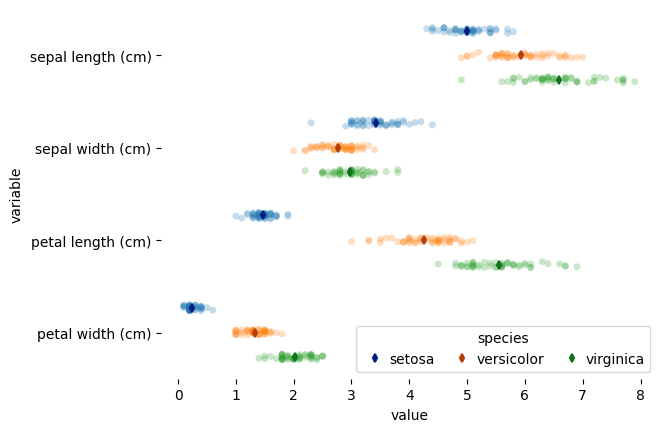

In [15]:
# Initialize the figure
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="value", y="variable", hue='target_name',
              data=iris_melt, dodge=True, alpha=.25, zorder=1)

# Show the conditional means, aligning each pointplot in the
# center of the strips by adjusting the width allotted to each
# category (.8 by default) by the number of hue levels
sns.pointplot(x="value", y="variable", hue='target_name',
              data=iris_melt, dodge=.8 - .8 / 3,
              join=False, palette="dark",
              markers="d", scale=.75, ci=None)

# Improve the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], labels[3:], title="species",
          handletextpad=0, columnspacing=1,
          loc="lower right", ncol=3, frameon=True)

# What are we looking for on these plots

We want these types of plots during the exploratory data analysis phase of a project, just to get a sense of what we are dealing with.

You can often see from the box or violin plots whether or not the variables overlap for the different clases,    if there are variables with no overlap,  a classifier will work well on the data

The plots also help us look for evidence of outliers or errors in the data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## What do different distributions look like on these plots

We always want to know roughly what distribution we have for the continuous variables

The main distributions I look for are

    gaussian or normal- the classic bell curve, with the mean in the center of the distribution
    
    uniform- with the mean in the middle and uniform density of points between the maximum and the minimum
    
    exponential or log normal- with a long "tail" to the positive side,  common in economic data

In [16]:
# Question/Activity

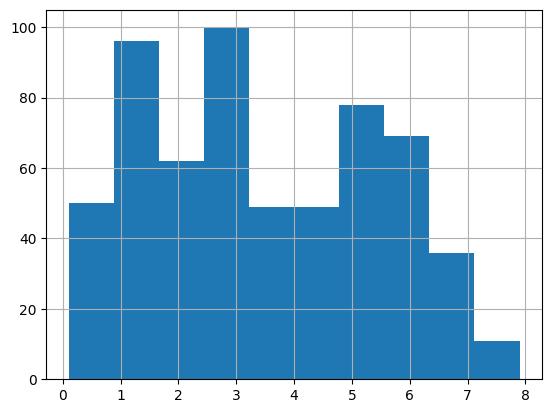

In [21]:
iris_melt['value'].hist()
